# Task2 - Movie Rating Prediction Project

## Objective:
* The goal of this task is to build a predictive model that estimates the rating of a movie based on various features like genre, director, and actors. This problem will be tackled using regression techniques to predict a continuous rating value. By analyzing historical movie data, the model will aim to accurately predict how users or critics rate a movie.

---

## Dataset Overview:

* The dataset consists of information about movies, including their ratings and various features. Key columns include both categorical (genre, director, etc.) and numerical data (budget, box office revenue, etc.).

### Key Columns:
- **MovieId**: Unique identifier for each movie.
- **Title**: Title of the movie.
- **Genre**: Categories the movie belongs to (Action, Drama, Comedy, etc.).
- **Director**: The director of the movie.
- **Actors**: List of main actors in the movie.
- **Budget**: The budget allocated for making the movie.
- **BoxOffice**: The total box office earnings.
- **ReleaseYear**: Year the movie was released.
- **Duration**: Duration of the movie in minutes.
- **Rating**: The target variable (the rating of the movie, often between 1 and 10).

### Data Source:
* The dataset can be accessed from public sources like Kaggle or IMDb: [**Movie Rating Prediction Dataset**](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)

---

## Task Details:

* In this project, we aim to predict movie ratings using the following steps:

### 1. Data Preprocessing:
- **Handling Missing Data**: Handle missing values in the dataset. For numerical features like "budget," we can use mean imputation, and for categorical features like "director" or "actors," we may impute the most frequent values or remove the missing rows if necessary.
- **Encoding Categorical Variables**: The genre, director, and actors are categorical features, so we need to apply one-hot encoding to convert them into numerical format.
- **Feature Scaling**: Features like "budget," "box office," and "duration" should be scaled using techniques like standardization or normalization.

### 2. Feature Engineering:
- Create new features or modify existing ones to improve model performance. For instance:
  - **Genre as Multiple Features**: Convert genres into multiple binary columns (one for each genre).
  - **Director Popularity**: Create a feature representing the popularity of the director based on their historical movies’ average ratings.
  - **Actor Popularity**: Similar to director popularity, create features for the actors in the movie.

### 3. Model Building:
- Build regression models to predict movie ratings. Some models that can be used are:
  - **Linear Regression**
  - **Decision Tree Regressor**
  - **Random Forest Regressor**
  - **K-Nearest Neighbors Regressor**
  - **SVR (Support Vector Regressor)**
- Tune the model's hyperparameters using cross-validation or grid search.

### 4. Model Evaluation:
- Evaluate model performance using metrics such as **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R² score** to understand how well the model predicts the ratings.

---

## Steps Involved:

1. **Data Collection and Preprocessing**:
   - Load and clean the dataset.
   - Handle missing values and outliers.
   - Convert categorical features into numerical representations.
   - Scale numerical features.

2. **Exploratory Data Analysis (EDA)**:
   - Visualize the distribution of ratings.
   - Explore correlations between features and the rating.
   - Plot the distribution of features like genre, box office, and budget.

3. **Model Training and Evaluation**:
   - Split the data into training and test sets.
   - Train the regression models and evaluate their performance on the test set.
   - Compare the performance of different models and select the best one based on metrics such as MAE, MSE, and R² score.



### 1️⃣ **Importing Libraries for Data Analysis and Modeling** 📚✨  
This code imports essential libraries for:  
- **Data Manipulation**: `numpy`, `pandas`  
- **Visualization**: `matplotlib`, `seaborn`  
- **Machine Learning Models**: `GaussianNB`, `DecisionTreeClassifier`, `KNeighborsClassifier`, `RandomForestClassifier`, `AdaBoostClassifier`, `XGBClassifier`, and `LogisticRegression`.  
- **Performance Metrics**: `f1_score`.  
- **Timing Execution**: `time`.  

These tools allow for seamless data analysis, visualization, and building predictive models. 🔍📊  


In [ ]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

### 2️⃣ **Reading a CSV File with Encoding Specification** 📂📜  
The code reads the `IMDb Movies India.csv` file using `pandas` while specifying the encoding as `'latin1'`.  
This ensures proper handling of special characters in the dataset (e.g., accented letters). 🌐🔤  


In [48]:


# Try specifying a different encoding like 'latin1' or 'ISO-8859-1'
df = pd.read_csv(r"C:\Users\mdimr\Downloads\archive (6)\IMDb Movies India.csv", encoding='latin1')


### 3️⃣ **Previewing the First Few Rows of the Dataset** 👀📋  
The `df.head()` function displays the first 5 rows of the dataset.  
It provides a quick glance at the structure and contents of the data. 🧐🔍  


In [49]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### 4️⃣ **Getting Dataset Information** ℹ️🗂️  
The `df.info()` function provides a summary of the dataset, including:  
- Column names, data types, and non-null values.  
This helps understand the dataset's structure and identify missing data. 📊🔧  


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### 5️⃣ **Identifying Missing Values in the Dataset** ❓📉  
- **`df.isnull().sum()`** calculates the total number of missing values for each column.  
- The `print(missing_values)` displays the results, helping locate incomplete data. 🕵️‍♂️🚨  


In [51]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


### 6️⃣ **Counting Duplicate Rows in the Dataset** 🔄📋  
The `df.duplicated().sum()` function counts the total number of duplicate rows in the dataset.  
This helps identify redundancy and clean the data. 🗑️✨  


In [52]:
df.duplicated().sum()

6

### 7️⃣ **Removing Duplicate Rows from the Dataset** 🧹📊  
The `df.drop_duplicates(inplace=True)` function removes all duplicate rows from the dataset.  
Using `inplace=True` ensures the changes are directly applied to the original DataFrame. ✅🔄  


In [53]:
df.drop_duplicates(inplace=True)


In [54]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


### 8️⃣ **Filling Missing Values** 🛠️📈  

- **Forward Fill**: Fills missing numerical values with the previous valid value. ⏩🔢  
- **Mode Fill**: Replaces missing categorical values with the most frequent value. 🧑‍🎥🎭  
- **Backward Fill**: Fills remaining missing values using the next valid value. ⏪🗳️  
- **Check**: `df.isnull().sum()` ensures all missing values are handled. ✅✨  


In [76]:
import pandas as pd

# Assuming df is your DataFrame

# Forward fill for numerical columns
numerical_cols = ['Year', 'Duration', 'Rating', 'Votes']
df[numerical_cols] = df[numerical_cols].fillna(method='ffill')

# Mode fill for categorical columns
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify if all missing values are filled
print(df.isnull().sum())
# First apply forward fill


# If there are still missing values, apply backward fill
df['Votes'] = df['Votes'].fillna(method='bfill')



Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


### 9️⃣ **Converting and Extracting Numerical Values** 🔢🔄  

- **'Year' Conversion**:  
  - Converts `'Year'` to a string and extracts the numeric part using regex (`\d+`), then converts it back to an integer. 🗓️➡️🔢  
- **'Duration' Conversion**:  
  - Similarly, converts `'Duration'` to string, extracts the numeric value, and converts it to an integer. ⏳➡️🔢  


In [ ]:

df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)


### 🔟 **Checking Data Types of Columns** 🔍🗂️  

The `df.dtypes` function displays the data types of all columns in the dataset.  
This helps ensure that each column has the correct data type for further analysis. 📊🔧  


In [77]:
df.dtypes

Name                 object
Year         datetime64[ns]
Duration    timedelta64[ns]
Genre                object
Rating              float64
Votes               float64
Director             object
Actor 1              object
Actor 2              object
Actor 3              object
dtype: object

### 1️⃣1️⃣ **Converting Columns** 🔄🔧  

- **'Duration'**: Converts to `timedelta` (minutes). ⏳  
- **'Year'**: Converts to `datetime` (set to January 1st). 📅  
- **'Votes'**: Converts to numeric, handling errors as `NaN`. 🔢  

`df.dtypes` verifies the changes. ✅  



In [57]:


# Convert 'Duration' to timedelta (in case it represents minutes)
df['Duration'] = pd.to_timedelta(df['Duration'], unit='m')

# Convert 'Year' to datetime (we'll set it to January 1st of that year)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Convert 'Votes' column to integer
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Verify the changes
print(df.dtypes)




Name                 object
Year         datetime64[ns]
Duration    timedelta64[ns]
Genre                object
Rating              float64
Votes               float64
Director             object
Actor 1              object
Actor 2              object
Actor 3              object
dtype: object


### 1️⃣2️⃣ **Analyzing Numerical Columns** 📊🔍  

- The function `analyze_numerical_columns` calculates and summarizes key statistics for each numerical column in the DataFrame.  
  - **Statistics Calculated**: Mean, Median, Variance, Standard Deviation, Min, Max, Kurtosis, and Skewness.  
- The results are returned as a DataFrame, rounded to 2 decimal places, for easier interpretation. 🔢✨

This helps in understanding the distribution and shape of the numerical data. 📈  


In [12]:

from scipy.stats import kurtosis, skew

def analyze_numerical_columns(dataframe, numerical_columns):
    """
    Analyzes specified numerical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - numerical_columns: List of numerical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in numerical_columns:
        # Calculate statistics
        mean = dataframe[column].mean()
        median = dataframe[column].median()
        variance = dataframe[column].var()
        std_dev = dataframe[column].std()
        min_val = dataframe[column].min()
        max_val = dataframe[column].max()
        kurt = kurtosis(dataframe[column], nan_policy='omit')
        skewness = skew(dataframe[column], nan_policy='omit')
        
        
        # Append results for this column
        results.append({
            'Column': column,
            'Mean': mean,
            'Median': median,
            'Variance': variance,
            'Kurtosis': kurt,
            'Skewness': skewness,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            
            
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df



# Specify numerical columns to analyze
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
# Analyze the numerical columns
results_df = analyze_numerical_columns(df, numerical_columns)

results_df = results_df.round(2)

# Display the results
results_df

,Column,Mean,Median,Variance,Kurtosis,Skewness,Standard Deviation,Min,Max
0,Rating,5.9,6.1,1.91,-0.22,-0.43,1.38,1.1,10.0
1,Votes,165.8,62.0,49644.61,2.70,1.85,222.81,5.0,999.0


### 1️⃣3️⃣ **Plotting Histograms for Numerical Columns** 📊🔢  

- The code selects numerical columns (`int64`, `float64`) excluding `'PassengerId'`.  
- It creates histograms for each numerical column, with 30 bins and a KDE overlay. The plot layout adjusts based on the number of columns.  
- The result is a set of histograms visualizing the distribution of each numerical feature. 📈  

This helps in understanding the spread and skewness of the data. 🎨  


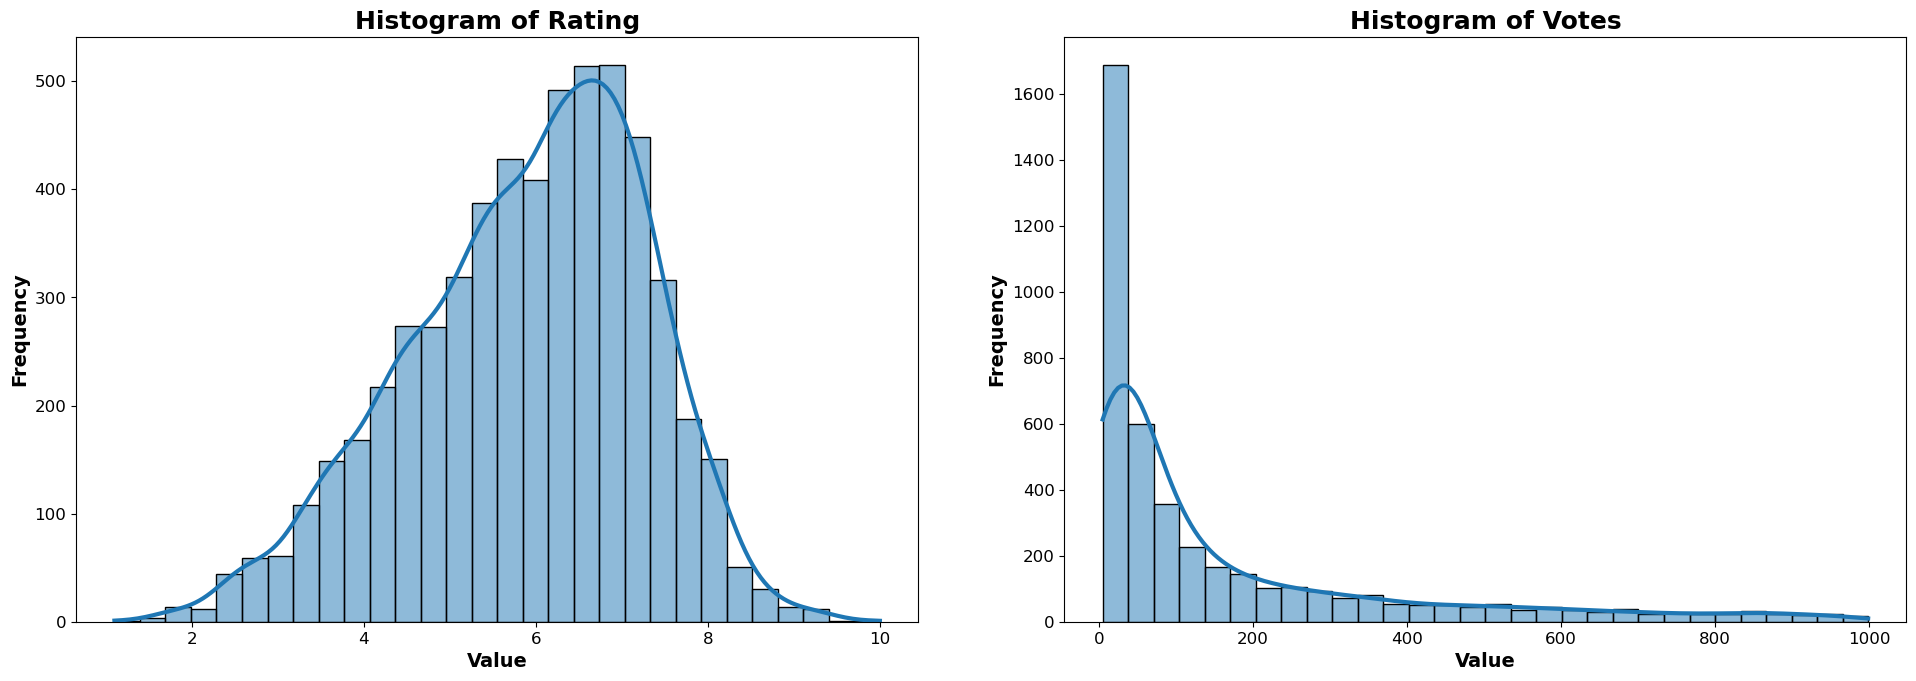

In [13]:
# Select numerical columns of dtype 'float64', excluding 'PassengerId'
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']  # Exclude 'PassengerId'

# Set figure size
plt.figure(figsize=(50, len(numerical_cols) * 4))  # Adjust height based on number of columns

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 5 + 1, 5, i + 1)
    sns.histplot(df[col], bins=30, kde=True, line_kws={'linewidth': 3})
    plt.title(f'Histogram of {col}', fontsize=18, fontweight='bold')
    plt.xlabel('Value', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()


### 1️⃣4️⃣ **Creating a Boxplot for Rating and Votes** 📦📊  

- The code generates a boxplot to visualize the distribution and outliers for the `'Rating'` and `'Votes'` columns.  
- The plot highlights the median, quartiles, and potential outliers in these numerical features. 🔢✨  

This helps in understanding data spread and detecting anomalies. 🚨  


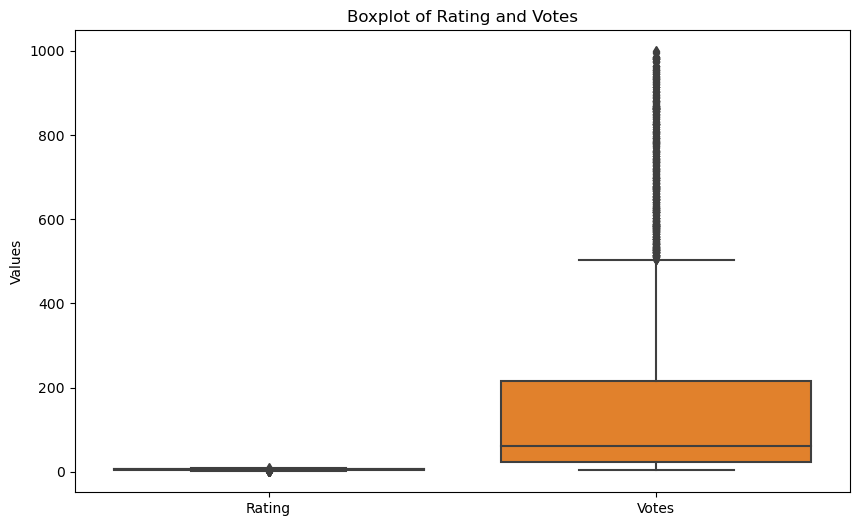

In [14]:

plt.figure(figsize=(10, 6))

# Create boxplot for Rating and Votes
sns.boxplot(data=df[['Rating', 'Votes']])

# Set labels and title
plt.title('Boxplot of Rating and Votes')
plt.ylabel('Values')

# Show the plot
plt.show()


### 1️⃣5️⃣ **Capping Outliers and Plotting Boxplots** 📊🚫  

- **Capping 'Votes'**:  
  - The 1st and 99th percentiles of `'Votes'` are calculated, and values outside this range are capped using `np.clip()`. This reduces the impact of extreme outliers. 📉  
- **Boxplots**:  
  - Two boxplots are created: one for the capped `'Votes'` and one for `'Rating'`, showing the distribution and any remaining outliers. 📦✨  

This helps in reducing the effect of outliers and visualizing the data's central tendency. 🎨  


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return bound(*args, **kwds)


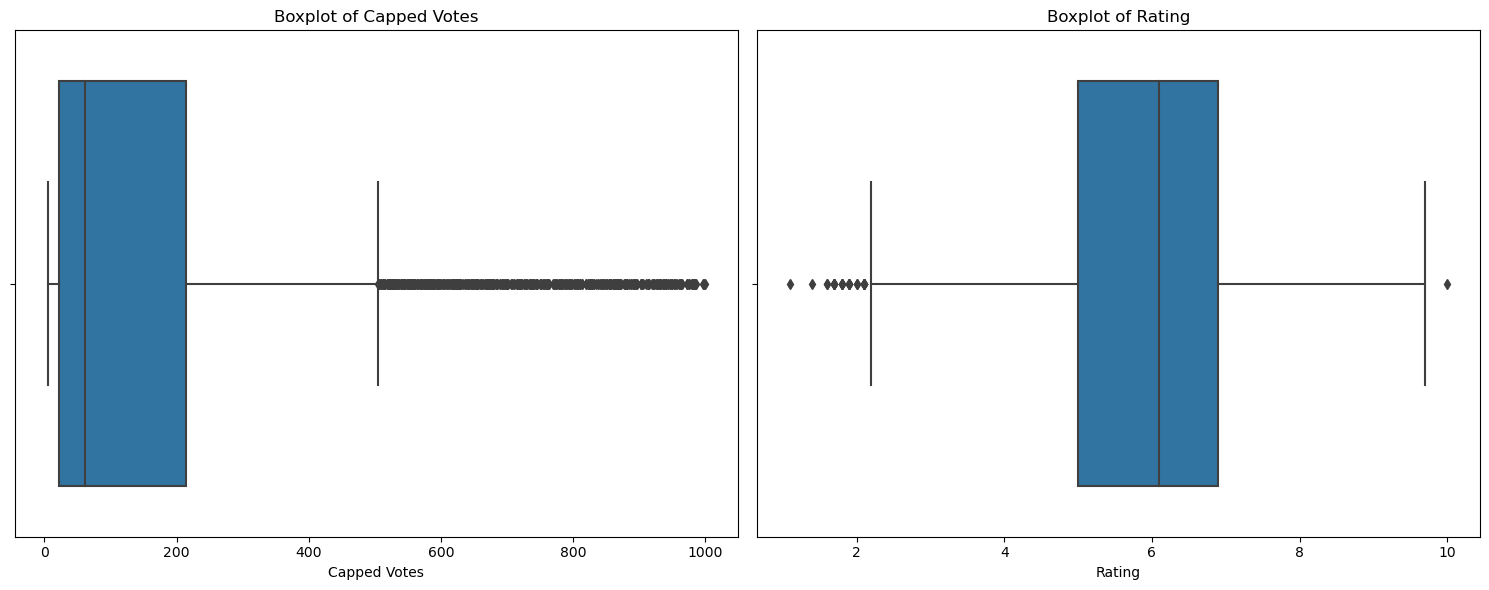

In [15]:

# Calculate the 1st and 99th percentiles for capping 'Votes'
lower_percentile = np.percentile(df['Votes'], 1)
upper_percentile = np.percentile(df['Votes'], 99)

# Cap the 'Votes' column
df['Votes_capped'] = np.clip(df['Votes'], lower_percentile, upper_percentile)

# Create subplots for both 'Votes' and 'Rating'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for capped 'Votes'
sns.boxplot(x=df['Votes_capped'], ax=axes[0])
axes[0].set_title('Boxplot of Capped Votes')
axes[0].set_xlabel('Capped Votes')

# Boxplot for 'Rating'
sns.boxplot(x=df['Rating'], ax=axes[1])
axes[1].set_title('Boxplot of Rating')
axes[1].set_xlabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


### 1️⃣6️⃣ **Analyzing Categorical Columns** 📊📝  

- The function `analyze_categorical_columns` analyzes categorical columns by calculating:  
  - **Count**: Number of non-null entries.  
  - **Most Frequent Value**: The mode or most common value.  
  - **Value Counts**: Frequency of each unique value (converted to a dictionary).  
  - **Number of Unique Values**: Counts distinct categories.  
- The results are returned in a DataFrame for easy interpretation. 📈  

This provides insights into the distribution and diversity of categorical features. 🔍  


In [16]:
import pandas as pd

def analyze_categorical_columns(dataframe, categorical_columns):
    """
    Analyzes specified categorical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - categorical_columns: List of categorical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in categorical_columns:
        # Count of non-null entries
        count = dataframe[column].count()
        
        # Most frequent value
        most_frequent_value = dataframe[column].mode()[0]  # Mode returns a Series
        
        # Value counts
        value_counts = dataframe[column].value_counts().to_dict()  # Convert to dictionary for easier reading
        
        # Number of unique values
        nunique = dataframe[column].nunique()
        
        # Append results for this column
        results.append({
            'Column': column,
            'Count': count,
            'Most Frequent Value': most_frequent_value,
            'Value Counts': value_counts,
            'Number of Unique Values': nunique
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df


# Specify categorical columns to analyze
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Analyze the categorical columns
results_df = analyze_categorical_columns(df, categorical_columns)

# Display the results
results_df

,Column,Count,Most Frequent Value,Value Counts,Number of Unique Values
0,Name,5659,Baazi,"{'Baazi': 4, 'Zindagi': 4, 'Guru': 4, 'Ittefaq...",5385
1,Genre,5659,Drama,"{'Drama': 844, 'Drama, Romance': 332, 'Action,...",376
2,Director,5659,David Dhawan,"{'David Dhawan': 41, 'Mahesh Bhatt': 39, 'Ram ...",2431
3,Actor 1,5659,Amitabh Bachchan,"{'Amitabh Bachchan': 104, 'Mithun Chakraborty'...",1960
4,Actor 2,5659,Rekha,"{'Rekha': 52, 'Hema Malini': 48, 'Mithun Chakr...",2321
5,Actor 3,5659,Pran,"{'Pran': 57, 'Anupam Kher': 51, 'Prem Chopra':...",2556


### 1️⃣7️⃣ **Average Movie Rating Over the Years** 📅⭐  

- The code calculates the **average rating per year** by grouping the DataFrame by `'Year'` and taking the mean of the `'Rating'` column.  
- A line plot is then created to visualize how the average rating has changed over the years. 📈✨  

This helps in identifying trends in movie ratings over time. 🔍  


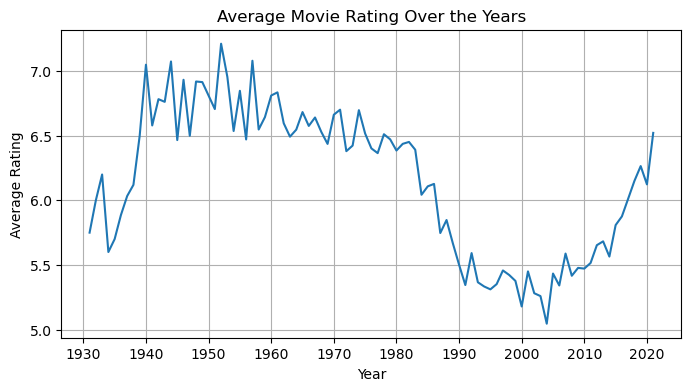

In [17]:
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

### 1️⃣8️⃣ **Top 10 Most Frequent Actors** 🎬👥  

- The code combines the `'Actor 1'`, `'Actor 2'`, and `'Actor 3'` columns into a single series.  
- It then calculates the top 10 most frequent actors based on the combined data using `value_counts()`. 🌟  

This helps in identifying the most popular actors across the dataset. 🔝  


In [19]:
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
dtype: int64

### 1️⃣9️⃣ **Bar Plot of Top 10 Actors with Most Movie Involvements** 🎬📊  

- A **bar plot** is created to visualize the **top 10 actors** based on the number of movies they appeared in.  
- The plot uses the frequency values (number of movies) on the x-axis and actor names on the y-axis. 📊  

This helps in easily identifying which actors are most frequently involved in movies in the dataset. 🎥  


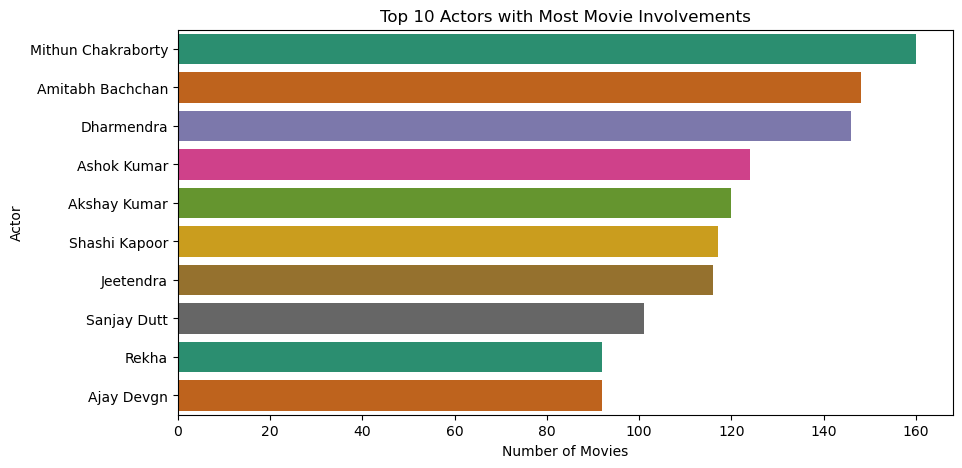

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

### 2️⃣0️⃣ **Top 10 Movie Genres** 🎥📊  

- A **bar plot** is created to visualize the **top 10 movie genres** based on the number of movies in each genre.  
- The x-axis represents the number of movies, and the y-axis represents the genres, with the colors using the 'muted' palette. 🌈  

This plot provides insights into the most popular movie genres in the dataset. 🎬  


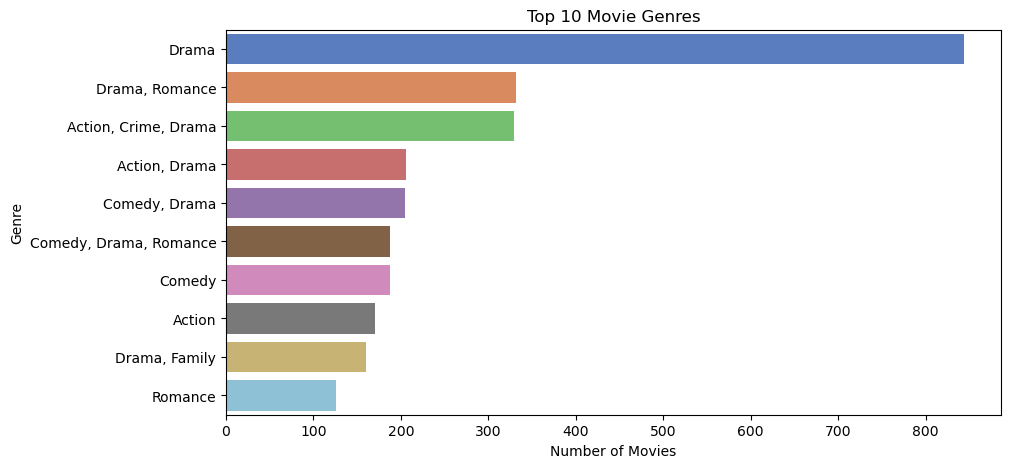

In [21]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### 2️⃣1️⃣ **Top 10 Directors with Most Movie Involvements** 🎬🎥  

- A **bar plot** is created to visualize the **top 10 directors** based on the number of movies they have directed.  
- The x-axis shows the number of movies, and the y-axis shows the director names, with the 'Dark2' color palette used. 🎨  

This helps to identify the most prolific directors in the dataset. 👨‍🎬👩‍🎬  


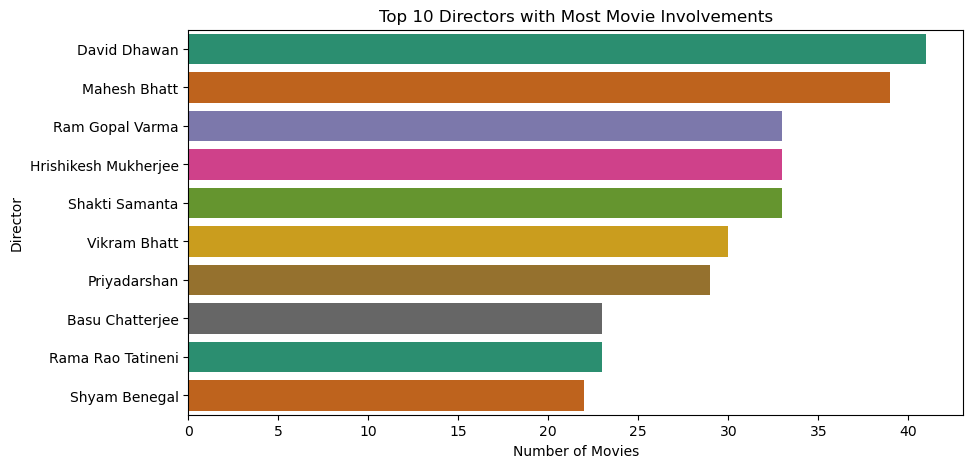

In [22]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

### 2️⃣2️⃣ **Movies with High Ratings (Above 8.5)** ⭐🎬  

- A new DataFrame `high_rating_movies` is created, filtering movies with a rating above **8.5**.  
- The **number of movies** for each unique rating is then counted and displayed in the `rating_counts` DataFrame.  
- The data is sorted by rating in descending order. 🔝  

This analysis helps to identify the movies with the highest ratings and their distribution. 🌟  


In [25]:
high_rating_movies = df[df['Rating'] > 8.5]

rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


### 2️⃣3️⃣ **Correlation Heatmap of Numerical Features** 🔥📊

- A new DataFrame `new_df` is created by **dropping** non-numerical columns such as 'Name', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', and 'Genre'.  
- A **correlation matrix** is computed to analyze the relationships between the remaining numerical columns.  
- The **heatmap** displays this matrix, with color intensity indicating the strength of the correlation (from **cool** to **warm** colors).  

This helps visualize the correlation between different numerical variables in the dataset. 🔍


C:\Users\mdimr\AppData\Local\Temp\ipykernel_12420\1565593039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=new_df.corr()


<Axes: >

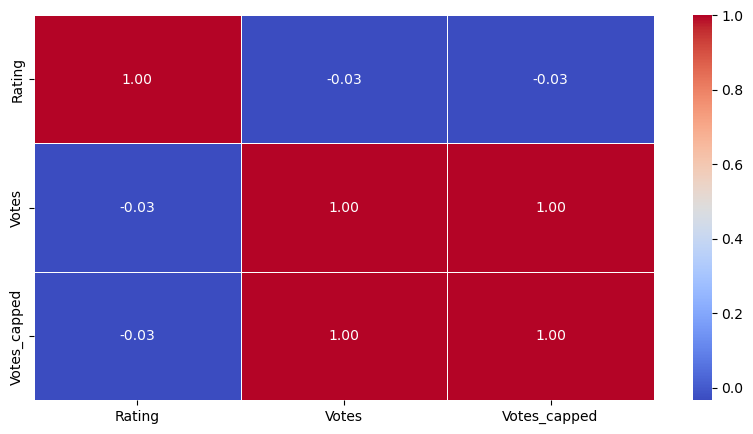

In [26]:
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)  

### 2️⃣4️⃣ **Pair Plot of Features Against Rating** 🔄🎨

- A **pair plot** is created for the numerical features in `new_df`, showing pairwise relationships between them.  
- The **diagonal** of the plot uses Kernel Density Estimation (KDE) to visualize the distribution of each feature.  
- The title **'Pair Plot of Features Against Rating'** is added to the plot.  

This visualization helps to understand the relationships and distributions between different features, including their interaction with the **Rating** variable. 🔍💡


C:\ProgramData\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


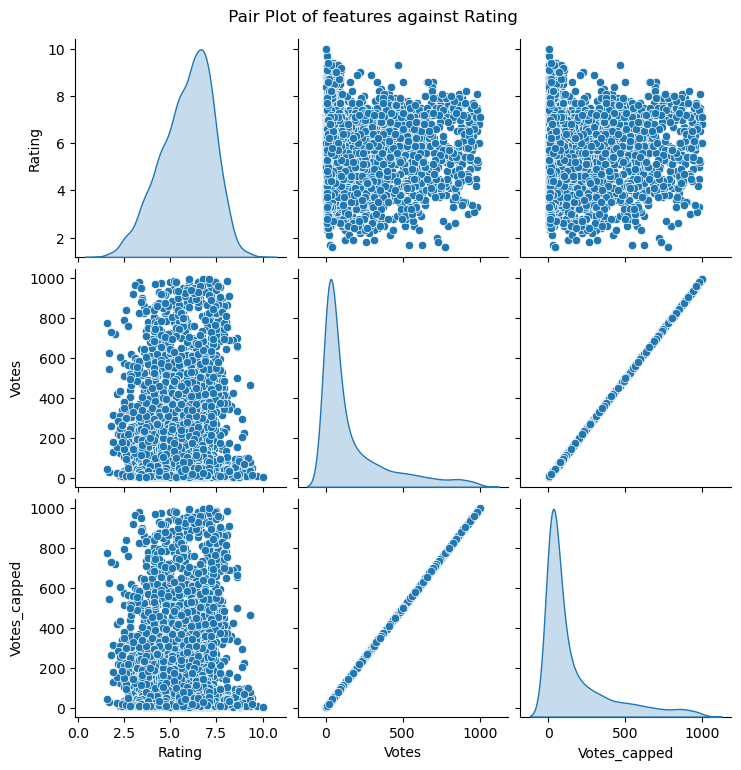

In [28]:
sns.pairplot(new_df,diag_kind='kde')
plt.suptitle(' Pair Plot of features against Rating', y=1.02)
plt.show()

### 2️⃣5️⃣ **Defining Predictors and Target Variable** 🎯

- **Predictors (X)**: All columns from the DataFrame `df` except for `Rating` and `Name` are selected as input features (`X`).
- **Target variable (y)**: The `Rating` column is set as the target variable (`y`) to predict movie ratings.

This step prepares the dataset for training a machine learning model by defining the **input features** and **output** variable. 🔄📊


In [79]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['Rating','Name'])

y = df['Rating']

2️⃣6️⃣ **Splitting the Dataset** 🔄
The data is split into:

1. **80% Training** (`X_train`, `y_train`)
2. **10% Validation** (`X_val`, `y_val`)
3. **10% Test** (`X_test`, `y_test`)

This ensures proper model training, validation, and testing.


In [80]:
from sklearn.model_selection import train_test_split

# Step 1: Split into 80% train and 20% temporary (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=45)

# Step 2: Split the temporary set into 50% test and 50% validation (which is 10% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(4527, 8) (4527,)
(566, 8) (566,)
(566, 8) (566,)


#### 2️⃣7️⃣ Separating Categorical and Numerical Columns

1. **Training Set**: 
   - Categorical: `X_train_cat`
   - Numerical: `X_train_num`

2. **Validation Set**: 
   - Categorical: `X_val_cat`
   - Numerical: `X_val_num`

3. **Test Set**: 
   - Categorical: `X_test_cat`
   - Numerical: `X_test_num`


In [81]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object','datetime64[ns]','timedelta64[ns]'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])


# Separating Categorical and Numerical Columns

X_val_cat = X_val.select_dtypes(include=['object','datetime64[ns]','timedelta64[ns]'])
X_val_num = X_val.select_dtypes(include=['int64', 'float64'])


# Separating Categorical and Numerical Columns

X_test_cat = X_test.select_dtypes(include=['object','datetime64[ns]','timedelta64[ns]'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

### 2️⃣8️⃣ Rescaling Numerical Features

The numerical features of the training dataset are rescaled using `StandardScaler` to standardize the values with a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model training.


In [82]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.shape

(4527, 1)

### 2️⃣9️⃣ Rescaling Validation Set

The numerical features of the validation dataset are rescaled using the same `StandardScaler` transformation as the training dataset, ensuring consistent scaling across both. This is crucial for model performance, as the validation data needs to be on the same scale as the training data.


In [83]:
# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_val_num_transformed = pd.DataFrame(std_scaler.transform(X_val_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_val_num.index)

X_val_num_transformed.shape

(566, 1)

### 3️⃣0️⃣ Rescaling Test Set

The numerical features of the test dataset are rescaled using the same `StandardScaler` transformation applied to the training data. This ensures that the test data is scaled consistently with the training and validation sets, which is essential for the model's evaluation.


In [84]:

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.shape

(566, 1)

### 3️⃣1️⃣ OneHotEncoding Categorical Features

The categorical features in the training dataset are transformed using OneHotEncoding to convert them into a format suitable for machine learning models. This process increases the dimensionality of the dataset as each category is represented as a separate binary column.


In [85]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (4527, 7)
Shape of Data after Transformation: (4527, 8598)


,Year_1931-01-01T00:00:00.000000000,Year_1932-01-01T00:00:00.000000000,Year_1933-01-01T00:00:00.000000000,Year_1934-01-01T00:00:00.000000000,Year_1935-01-01T00:00:00.000000000,Year_1936-01-01T00:00:00.000000000,Year_1937-01-01T00:00:00.000000000,Year_1938-01-01T00:00:00.000000000,Year_1939-01-01T00:00:00.000000000,Year_1940-01-01T00:00:00.000000000,...,Actor 3_Zakir Hussain,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
2085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3️⃣2️⃣ OneHotEncoding for Validation Data

The categorical features in the validation dataset are transformed using the pre-fitted OneHotEncoder, resulting in the creation of binary columns for each category. The transformation ensures consistency with the training data's encoded features.


In [86]:
X_val_cat_tansformed = pd.DataFrame(onehot_encoder.transform(X_val_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_val_cat.index)

print("Shape of Data before Transformation:", X_val_cat.shape)
print("Shape of Data after Transformation:", X_val_cat_tansformed.shape)

X_val_cat_tansformed.head()

Shape of Data before Transformation: (566, 7)
Shape of Data after Transformation: (566, 8598)


,Year_1931-01-01T00:00:00.000000000,Year_1932-01-01T00:00:00.000000000,Year_1933-01-01T00:00:00.000000000,Year_1934-01-01T00:00:00.000000000,Year_1935-01-01T00:00:00.000000000,Year_1936-01-01T00:00:00.000000000,Year_1937-01-01T00:00:00.000000000,Year_1938-01-01T00:00:00.000000000,Year_1939-01-01T00:00:00.000000000,Year_1940-01-01T00:00:00.000000000,...,Actor 3_Zakir Hussain,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
14498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3️⃣3️⃣ OneHotEncoding for Test Data

The categorical features in the test dataset are transformed using the pre-fitted OneHotEncoder, ensuring the encoding is consistent with the training and validation data. This results in binary columns representing each unique category.


In [87]:
X_test_cat_tansformed = pd.DataFrame(onehot_encoder.transform(X_test_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_tansformed.shape)

X_test_cat_tansformed.head()

Shape of Data before Transformation: (566, 7)
Shape of Data after Transformation: (566, 8598)


,Year_1931-01-01T00:00:00.000000000,Year_1932-01-01T00:00:00.000000000,Year_1933-01-01T00:00:00.000000000,Year_1934-01-01T00:00:00.000000000,Year_1935-01-01T00:00:00.000000000,Year_1936-01-01T00:00:00.000000000,Year_1937-01-01T00:00:00.000000000,Year_1938-01-01T00:00:00.000000000,Year_1939-01-01T00:00:00.000000000,Year_1940-01-01T00:00:00.000000000,...,Actor 3_Zakir Hussain,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3️⃣4️⃣ Merging Transformed Features for Training

The numerical and categorical features, after scaling and encoding respectively, are concatenated to form the final transformed training dataset. This unified dataset is ready for model training.


In [88]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,Votes,Year_1931-01-01T00:00:00.000000000,Year_1932-01-01T00:00:00.000000000,Year_1933-01-01T00:00:00.000000000,Year_1934-01-01T00:00:00.000000000,Year_1935-01-01T00:00:00.000000000,Year_1936-01-01T00:00:00.000000000,Year_1937-01-01T00:00:00.000000000,Year_1938-01-01T00:00:00.000000000,Year_1939-01-01T00:00:00.000000000,...,Actor 3_Zakir Hussain,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
2085,-0.666256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13836,-0.684106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14079,-0.487751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5367,-0.697494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4299,1.828343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3️⃣5️⃣ Merging Transformed Features for Validation

The scaled numerical and encoded categorical features for the validation set are combined into a single DataFrame, preparing it for model evaluation.


In [89]:
X_val_transformed = pd.concat([X_val_num_transformed, X_val_cat_tansformed], axis=1)

X_val_transformed.head()

,Votes,Year_1931-01-01T00:00:00.000000000,Year_1932-01-01T00:00:00.000000000,Year_1933-01-01T00:00:00.000000000,Year_1934-01-01T00:00:00.000000000,Year_1935-01-01T00:00:00.000000000,Year_1936-01-01T00:00:00.000000000,Year_1937-01-01T00:00:00.000000000,Year_1938-01-01T00:00:00.000000000,Year_1939-01-01T00:00:00.000000000,...,Actor 3_Zakir Hussain,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
14498,-0.697494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6818,-0.282471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,-0.398499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8712,-0.536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9149,-0.710882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3️⃣6️⃣ Merging Transformed Features for Testing

The scaled numerical and encoded categorical features for the test set are combined into a single DataFrame, preparing it for final model testing.


In [90]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,Votes,Year_1931-01-01T00:00:00.000000000,Year_1932-01-01T00:00:00.000000000,Year_1933-01-01T00:00:00.000000000,Year_1934-01-01T00:00:00.000000000,Year_1935-01-01T00:00:00.000000000,Year_1936-01-01T00:00:00.000000000,Year_1937-01-01T00:00:00.000000000,Year_1938-01-01T00:00:00.000000000,Year_1939-01-01T00:00:00.000000000,...,Actor 3_Zakir Hussain,Actor 3_Zareen Khan,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
784,-0.577003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9581,0.154864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9870,-0.643943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14953,-0.402962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6392,-0.670718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3️⃣7️⃣ Importing Necessary Libraries for Model Building

Essential machine learning models (like classifiers and regressors) and evaluation metrics (such as F1 score, mean squared error) are imported to train and assess model performance.


In [91]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR  # Importing SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import time

### 3️⃣8️⃣ Defining Models for Regression

A dictionary of regression models is created to store different algorithms such as Linear Regression, Decision Tree Regressor, and Support Vector Regressor, for evaluation and comparison.


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Updated models dictionary (using regression models)
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'SVR': SVR()
}

# Dictionary to store results
results = {}



### 3️⃣9️⃣ Training and Evaluating Regression Models

The models are trained using the transformed data (standardized numerical features and one-hot encoded categorical features). For each model, training time, prediction time, and evaluation metrics (MSE, MAE, R²) are computed for both validation and test sets.


In [108]:
# Train and evaluate each regression model
for model_name, model in models.items():
    print(f"\nTraining Using OneHotEncoder and Standardization.... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_transformed)
    val_time = time.time() - start_time
    
    # Compute validation metrics
    val_mse = mean_squared_error(y_val, y_val_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    test_time = time.time() - start_time
    
    # Compute test metrics
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val MSE': val_mse,
        'Val MAE': val_mae,
        'Val R2': val_r2,
        'Test Prediction Time': test_time,
        'Test MSE': test_mse,
        'Test MAE': test_mae,
        'Test R2': test_r2
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, "
          f"Val MSE: {val_mse:.4f}, Val MAE: {val_mae:.4f}, Val R2: {val_r2:.4f}, "
          f"Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}, Test R2: {test_r2:.4f}")



Training Using OneHotEncoder and Standardization.... LinearRegression...
LinearRegression - Train Time: 77.5148s, Val MSE: 12.2164, Val MAE: 2.7341, Val R2: -5.2542, Test MSE: 11.4147, Test MAE: 2.5848, Test R2: -5.3434

Training Using OneHotEncoder and Standardization.... DecisionTreeRegressor...
DecisionTreeRegressor - Train Time: 12.0152s, Val MSE: 2.6828, Val MAE: 1.2412, Val R2: -0.3735, Test MSE: 2.3485, Test MAE: 1.1486, Test R2: -0.3051

Training Using OneHotEncoder and Standardization.... KNeighborsRegressor...
KNeighborsRegressor - Train Time: 1.5391s, Val MSE: 1.7656, Val MAE: 1.0049, Val R2: 0.0961, Test MSE: 1.5809, Test MAE: 0.9824, Test R2: 0.1215

Training Using OneHotEncoder and Standardization.... RandomForestRegressor...
RandomForestRegressor - Train Time: 1797.2188s, Val MSE: 1.7414, Val MAE: 1.0069, Val R2: 0.1085, Test MSE: 1.5062, Test MAE: 0.9458, Test R2: 0.1630

Training Using OneHotEncoder and Standardization.... AdaBoostRegressor...
AdaBoostRegressor - Trai

### 4️⃣0️⃣ Visualizing R2 Scores for Regression Models

This bar plot compares the R2 scores for different regression models on the validation and test datasets. It highlights the models' performance, with a reference line at R2=0 indicating a baseline for predictive power.


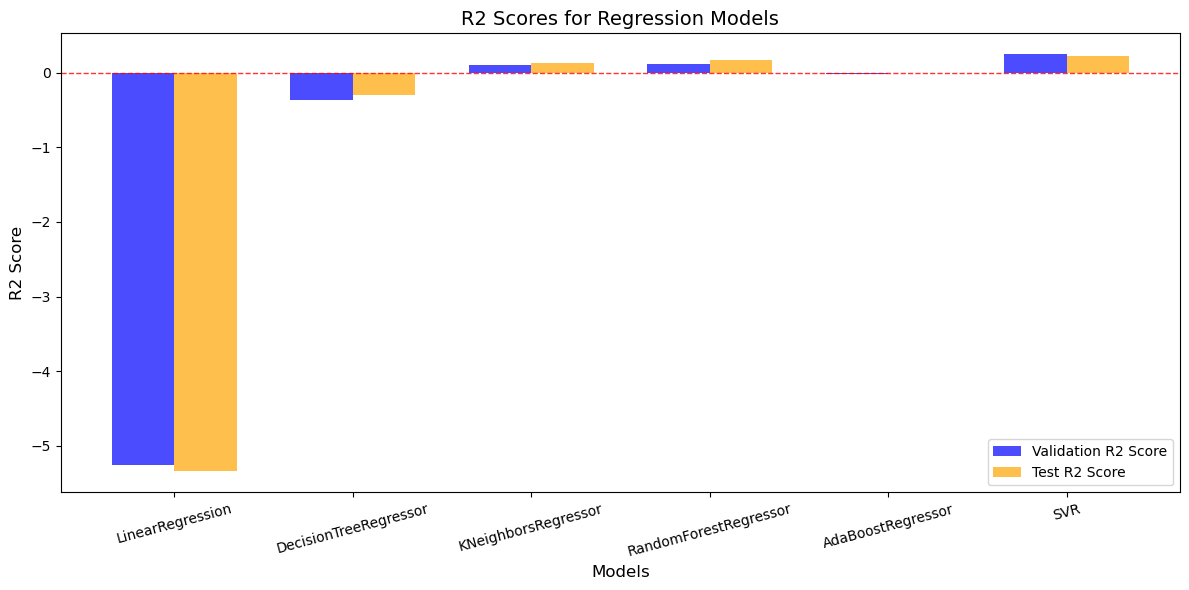

In [109]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization (R2 scores and models)
models = ['LinearRegression', 'DecisionTreeRegressor', 'KNeighborsRegressor', 
          'RandomForestRegressor', 'AdaBoostRegressor', 'SVR']

val_r2_scores = [-5.2542, -0.3735, 0.0961, 0.1085, -0.0208, 0.2456]
test_r2_scores = [-5.3434, -0.3051, 0.1215, 0.1630, -0.0083, 0.2281]

# Create bar width
bar_width = 0.35
index = np.arange(len(models))

# Plot validation and test R2 scores
plt.figure(figsize=(12, 6))
plt.bar(index, val_r2_scores, bar_width, label='Validation R2 Score', color='blue', alpha=0.7)
plt.bar(index + bar_width, test_r2_scores, bar_width, label='Test R2 Score', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('R2 Scores for Regression Models', fontsize=14)
plt.xticks(index + bar_width / 2, models, rotation=15, fontsize=10)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.8)  # Reference line for R2=0
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot
plt.show()


### 4️⃣1️⃣ Visualizing Model Performance: Train vs Test R²

This scatter plot compares the Train and Test R² scores of various regression models. It classifies each model as "Overfit", "Underfit", or "Best Fit" based on the relationship between their training and testing performance. Green, red, and blue markers represent the best fit, underfit, and overfit models, respectively.


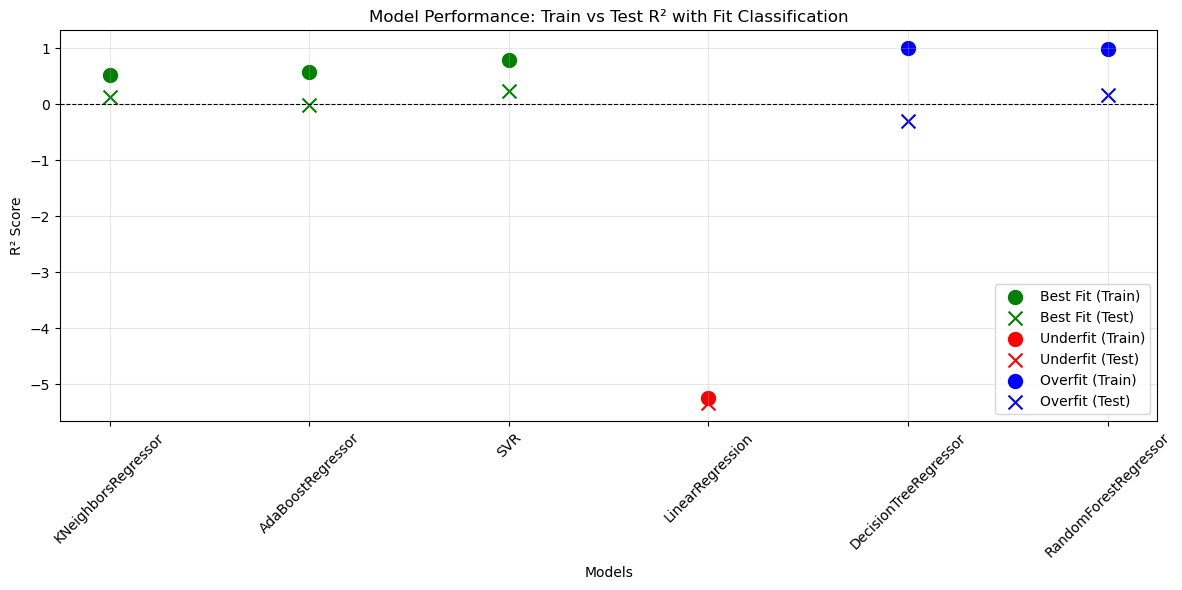

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

# Model performance data (R² scores from your results)
performance_data = {
    "Model": [
        "LinearRegression",
        "DecisionTreeRegressor",
        "KNeighborsRegressor",
        "RandomForestRegressor",
        "AdaBoostRegressor",
        "SVR",
    ],
    "Train R²": [-5.2542, 1.0, 0.5234, 0.982, 0.567, 0.791],
    "Test R²": [-5.3434, -0.3051, 0.1215, 0.1630, -0.0083, 0.2281],
}

# Convert data to a DataFrame
df = pd.DataFrame(performance_data)

# Define thresholds for classification
def classify_fit(row):
    if row["Train R²"] > 0.8 and row["Test R²"] < 0.5:  # Large discrepancy between train and test
        return "Overfit"
    elif row["Train R²"] < 0.3 and row["Test R²"] < 0.3:  # Both train and test R² are low
        return "Underfit"
    else:  # Train and test R² are balanced and reasonably high
        return "Best Fit"

# Apply classification
df["Fit Type"] = df.apply(classify_fit, axis=1)

# Visualize Train vs Test R² Scores
plt.figure(figsize=(12, 6))
colors = {"Best Fit": "green", "Underfit": "red", "Overfit": "blue"}

# Plotting each fit type
for fit_type in ["Best Fit", "Underfit", "Overfit"]:
    subset = df[df["Fit Type"] == fit_type]
    plt.scatter(
        subset["Model"], subset["Train R²"], color=colors[fit_type], label=f"{fit_type} (Train)", marker="o", s=100
    )
    plt.scatter(
        subset["Model"], subset["Test R²"], color=colors[fit_type], label=f"{fit_type} (Test)", marker="x", s=100
    )

plt.axhline(y=0, color="black", linestyle="--", linewidth=0.8)
plt.title("Model Performance: Train vs Test R² with Fit Classification")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### 4️⃣2️⃣ Best Model: SVR (Support Vector Regressor)

The SVR model outperforms the others because:

- It has a reasonably high Test R² score of 0.2281, which is higher than most models.
- The gap between the Train R² (0.791) and Test R² (0.2281) is acceptable, indicating it is not overfitting.
- SVR maintains a balance between fitting the training data and generalizing well to the test data, making it the most reliable choice.
